In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
#Read train data
trainData = pd.read_csv("Santander Customer Satisfaction - TRAIN.csv")
trainData.head()
#Read test data file
testData = pd.read_csv("Santander Customer Satisfaction - TEST-Without TARGET.csv")

# Exploratory Data Analysis


In [3]:
#Checking shape of training and testing datasets
print("Train data shape: ", trainData.shape)
print("Test data shape: ", testData.shape)

Train data shape:  (76020, 371)
Test data shape:  (75818, 370)


In [4]:
#check data type
trainData.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [5]:
#Descriptive statistics
trainData.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


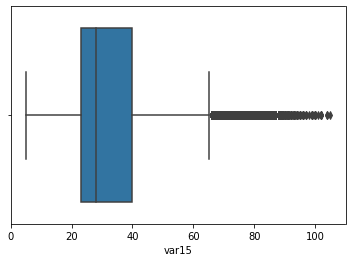

In [6]:
#Detecting outliers based on descriptive statistics
sns.boxplot(trainData["var15"])

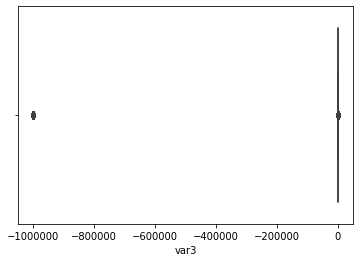

In [7]:
sns.boxplot(trainData["var3"]) #outlier- -999999

In [8]:
#Counting outliers in each column
trainData.groupby('var3')['var3'].count().sort_values(ascending =False)
testData.groupby('var3')['var3'].count().sort_values(ascending =False)


var3
 2         73962
-999999      120
 8           116
 9           108
 3           107
           ...  
 131           1
 55            1
 57            1
 62            1
 238           1
Name: var3, Length: 199, dtype: int64

In [9]:
# Replace -999999 with the most common value 2
trainData = trainData.replace(-999999,2)
testData = testData.replace(-999999,2)

In [10]:
#Remove ID column- irrelavent for data analysis
trainData=trainData.drop(["ID"],axis=1)
trainData.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [11]:
#Check for missing values
print("Null values in trainData= ", trainData.isnull().sum().sum())
print("Null values in testData= ",testData.isnull().sum().sum())

Null values in trainData=  0
Null values in testData=  0


In [12]:
#Remove columns with std dev=0: Has constant values- does not contribute to classification model
col_removed=0
for (columnName, columnData) in trainData.iteritems():
  std_dev=round(trainData[columnName].std(),2)
  if std_dev==0:
    trainData=trainData.drop(columns=columnName)
    testData=testData.drop(columns=columnName)
    print(columnName)
    col_removed=col_removed+1

print("Removed ",col_removed,"from trainData, Shape of trainData: ", trainData.shape)
print("Removed ",col_removed,"from testData, Shape of testData: ", testData.shape)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3
Removed  34 from trainData, Shape of trainData:  (76020, 336)
Removed  34 from testData, Shape of testData:  (75818, 336)


In [13]:
#Check for correlation
corr_matrix=pd.DataFrame(trainData.iloc[:,:-1].corr())
print(corr_matrix)

                             var3     var15  imp_ent_var16_ult1  \
var3                     1.000000  0.124320            0.000815   
var15                    0.124320  1.000000            0.043722   
imp_ent_var16_ult1       0.000815  0.043722            1.000000   
imp_op_var39_comer_ult1  0.103668  0.094762            0.041221   
imp_op_var39_comer_ult3  0.174162  0.101177            0.034879   
...                           ...       ...                 ...   
saldo_medio_var44_hace2  0.021088  0.029180            0.002655   
saldo_medio_var44_hace3  0.066479  0.018884           -0.000612   
saldo_medio_var44_ult1   0.010151  0.032833            0.005055   
saldo_medio_var44_ult3   0.010551  0.033597            0.006590   
var38                    0.013232  0.006497            0.000007   

                         imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
var3                                    0.103668                 0.174162   
var15                                   0

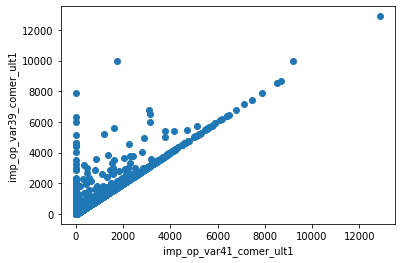

In [14]:
#Plotting one of the highly correlated pair of variables
plt.scatter(trainData["imp_op_var41_comer_ult1"],trainData["imp_op_var39_comer_ult1"])
plt.xlabel("imp_op_var41_comer_ult1")
plt.ylabel("imp_op_var39_comer_ult1")
plt.show()

In [15]:
#Remove highly correlated columns except for target column
arr=corr_matrix.values
index_names=corr_matrix.index
col_names=corr_matrix.columns

#Get indices where threshold of 0.98 is crossed; avoid diagonal elements
R,C=np.where(np.triu(arr,1) > 0.98)

#Arrange those in columns and put out as a dataframe
out_arr=np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out=pd.DataFrame(out_arr,columns=['row_name','col_name','corr_value'])

#Remove columns listed in col_name and keep columns in row_name ( Need to keep only 1 of related columns)
df_out=df_out.sort_values(by = 'corr_value', ascending = False)
df_out=df_out.query('row_name != col_name')
trainData.drop(df_out['col_name'].unique(),axis=1, inplace=True)
testData.drop(df_out['col_name'].unique(),axis=1, inplace=True)

print("trainData shape after removing highly correlated columns: ",trainData.shape)
print("testData shape after removing highly correlated columns: ",testData.shape)

trainData shape after removing highly correlated columns:  (76020, 231)
testData shape after removing highly correlated columns:  (75818, 231)


In [16]:
#Remove duplicate data
trainData=trainData.drop_duplicates()
testData=testData.drop_duplicates()

print("trainData shape after removing duplicate rows: ",trainData.shape)
print("testData shape after removing duplicate rows: ",testData.shape)

trainData shape after removing duplicate rows:  (71179, 231)
testData shape after removing duplicate rows:  (75818, 231)


# Dividing training data

In [17]:
df = pd.DataFrame(trainData.TARGET.value_counts())
df.head()

,TARGET
0,68364
1,2815


In [18]:
X = trainData.iloc[:, :-1]
X.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [19]:
#Select Y Target Column from the Train file
Y = trainData.iloc[:, -1]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Basic Decision Tree Classifier model

In [21]:
#Basic model
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred=pd.DataFrame(clf.predict(x_test),columns=["Target"])
pred.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [22]:
print("Accuracy score for base model is", clf.score(x_test,y_test))
print("Confusion matrix for base model: \n", confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

Accuracy score for base model is 0.9230682776060691
Confusion matrix for base model: 
 [[16346   730]
 [  639    80]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17076
           1       0.10      0.11      0.10       719

    accuracy                           0.92     17795
   macro avg       0.53      0.53      0.53     17795
weighted avg       0.93      0.92      0.93     17795



# Fine Tuning the model

##Model 1

In [23]:
#Create Decision Tree Classifier Model 1 - Maximum depth
clf=DecisionTreeClassifier(min_samples_split=10)
clf.fit(x_train,y_train)
#Making prediction with Model 1
pred=pd.DataFrame(clf.predict(x_test),columns=["Target"])
pred.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [24]:
print("Accuracy score for model 1 is", clf.score(x_test,y_test))
print("Confusion matrix for model 1: \n", confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

Accuracy score for model 1 is 0.9355436920483282
Confusion matrix for model 1: 
 [[16583   493]
 [  654    65]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17076
           1       0.12      0.09      0.10       719

    accuracy                           0.94     17795
   macro avg       0.54      0.53      0.53     17795
weighted avg       0.93      0.94      0.93     17795



##Model 2

In [25]:
#Model 2
clf=DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_leaf_nodes = 50)
clf.fit(x_train,y_train)
#Make prediction with Model 2
pred=pd.DataFrame(clf.predict(x_test),columns=["Target"])
pred.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [26]:
print("Accuracy score for model 2 is", clf.score(x_test,y_test))
print("Confusion matrix for model 2: \n", confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

Accuracy score for model 2 is 0.9594268052823827
Confusion matrix for model 2: 
 [[17071     5]
 [  717     2]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17076
           1       0.29      0.00      0.01       719

    accuracy                           0.96     17795
   macro avg       0.62      0.50      0.49     17795
weighted avg       0.93      0.96      0.94     17795



##Model 3

In [39]:
clf=DecisionTreeClassifier(min_samples_leaf=10)
clf.fit(x_train,y_train)
#Make prediction with Model 3
pred=pd.DataFrame(clf.predict(x_test),columns=["Target"])
pred.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [28]:
print("Accuracy score for model 3 is", clf.score(x_test,y_test))
print("Confusion matrix for model 3: \n", confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

Accuracy score for model 3 is 0.9565046361337455
Confusion matrix for model 3: 
 [[16991    85]
 [  689    30]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17076
           1       0.26      0.04      0.07       719

    accuracy                           0.96     17795
   macro avg       0.61      0.52      0.52     17795
weighted avg       0.93      0.96      0.94     17795



#Fitting test data into model

In [29]:
testData.head()
best_clf=

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [33]:
X_test=testData.iloc[:,1:]
X_test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [41]:
pred_test =pd.DataFrame(clf.predict(X_test),columns=["Prediction"])
pred_test.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [42]:
pred_Probability =pd.DataFrame(clf.predict_proba(X_test))
pred_Probability.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [45]:
ID=testData.iloc[:,0]
pd.concat([ID, pred_test],axis=1).to_csv("SantandarFinalResult.csv", index = None)
res=pd.read_csv("SantandarFinalResult.csv")
res.head()

,ID,Prediction
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
